In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/gdrive/My Drive/Colab Notebooks/dataset/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


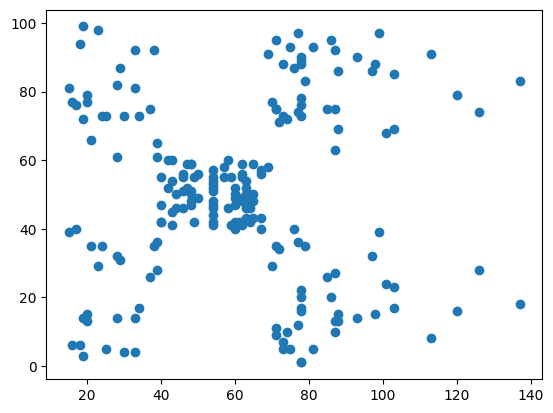

In [ ]:
# Create a scatter plot to visualize the relationship between Annual Income (in thousands of dollars) and Spending Score (on a scale from 1 to 100).
# This helps in identifying patterns or clusters in how spending behavior varies with income.
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])

In [ ]:
# Extract the columns 'Annual Income (k$)' and 'Spending Score (1-100)' from the dataframe into a new DataFrame 'x'.
# Display the first few rows of 'x' to preview the data and verify the selected columns.
x = df[['Annual Income (k$)', 'Spending Score (1-100)']]
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:
x.shape

(200, 2)

In [ ]:

 # Initialize centroids for k-means clustering.
def init_centroids(x, k):
    # Extract the number of samples (m) and features (n) from the dataset 'x'.
    m, n = x.shape
    # Initialize an array to hold the centroids, with 'k' rows and 'n' columns.
    centroids = np.zeros((k, n))
    # Randomly select 'k' indices from the dataset to choose initial centroids.
    index = np.random.randint(0, m, k)
    # Assign the data points at the selected indices as centroids.
    for i in range(k):
        centroids[i, :] = x.iloc[index[i], :]
     # Return the initialized centroids.
    return centroids

In [ ]:
initial_centroids=init_centroids(x,k)
initial_centroids

array([[74., 72.],
       [16., 77.],
       [43., 45.],
       [98., 15.],
       [99., 39.]])

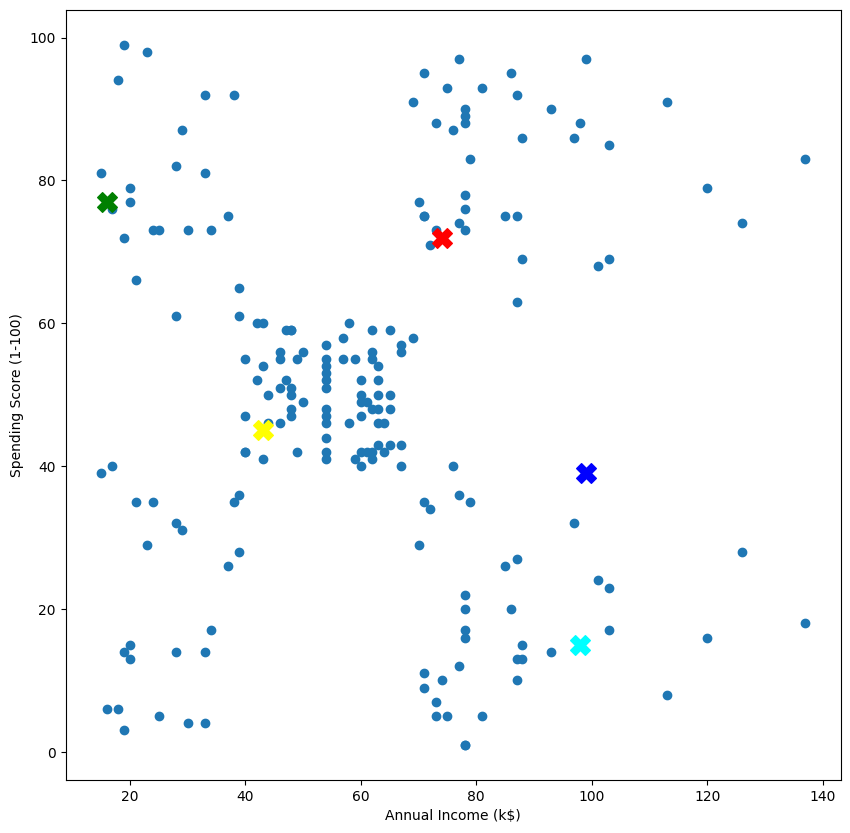

In [ ]:
# Define a list of colors for each centroid cluster
color = ['red', 'green', 'yellow', 'cyan', 'blue']
# Set the number of clusters (centroids)
k = 5
# Create a figure and axis object with a specified size for plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the data points for 'Annual Income (k$)' and 'Spending Score (1-100)' from the dataframe (df)
ax.scatter('Annual Income (k$)', 'Spending Score (1-100)', data=df)

# Loop through each centroid and plot them on the graph using the defined color scheme
for i in range(k):
    # Plot each centroid with a large 'X' marker, size 200, and corresponding color
    ax.scatter(initial_centroids[i][0], initial_centroids[i][1], marker='X', s=200, c=color[i])

# Set the x-axis label to 'Annual Income (k$)'
plt.xlabel('Annual Income (k$)')

# Set the y-axis label to 'Spending Score (1-100)'
plt.ylabel('Spending Score (1-100)')

# Display the plot with the data points and centroids
plt.show()

In [ ]:
def find_closest_centroids(x, centroids):
    # Get the number of rows (data points) in x
    m = x.shape[0]
    # Get the number of centroids (clusters)
    k = centroids.shape[0]
     # Initialize an array to store the index of the nearest centroid for each data point
    nearby_centroid = np.zeros(m)
    # Ensure x and centroids are numpy arrays for proper mathematical operations
    x = np.array(x)
    centroids = np.array(centroids)
    # Loop through each data point in x
    for i in range(m):
       # Initialize a very large distance to find the minimum distance later
        min_dist = 1000000
        # Loop through each centroid to find the closest one
        for j in range(k):
            # Compute the squared Euclidean distance between the data point and the centroid
            dist = np.sum((x[i, :] - centroids[j, :]) ** 2)
            # If the current distance is smaller than the minimum distance, update it
            if dist < min_dist:
                min_dist = dist
                # Assign the index of the nearest centroid to the nearby_centroid array
                nearby_centroid[i] = j
     # Return the array of nearest centroids for all data points
    return nearby_centroid


In [ ]:
nearby_centroid=find_closest_centroids(x,initial_centroids)
nearby_centroid

array([2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 2.,
       1., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1.,
       2., 1., 2., 1., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       0., 0., 0., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 0., 2.,
       0., 0., 2., 0., 0., 4., 0., 4., 0., 3., 0., 3., 0., 4., 0., 3., 0.,
       3., 0., 3., 0., 3., 0., 4., 0., 3., 0., 4., 0., 3., 0., 3., 0., 3.,
       0., 3., 0., 3., 0., 3., 0., 4., 0., 3., 0., 3., 0., 3., 0., 3., 0.,
       3., 0., 3., 0., 3., 0., 3., 0., 3., 0., 4., 0., 3., 0., 4., 0., 3.,
       0., 3., 0., 3., 0., 3., 0., 3., 4., 4., 4., 3., 4.])

In [ ]:
def compute_centroids(x,nearby_centroid,k):
  m,n=x.shape
  centroids=np.zeros((k,n))
  x=np.array(x)
  for i in range(k):
    indices=np.where(nearby_centroid==i)
    sum_of_cluster=np.sum(x[indices,:],axis=1)
    centroids[i,:]=(sum_of_cluster/len(indices[0]))
  return centroids

In [ ]:
new_centroids=compute_centroids(x,nearby_centroid,k)
new_centroids

array([[79.26666667, 77.35555556],
       [25.0952381 , 80.04761905],
       [46.5483871 , 42.30107527],
       [87.55172414, 13.79310345],
       [95.83333333, 45.33333333]])

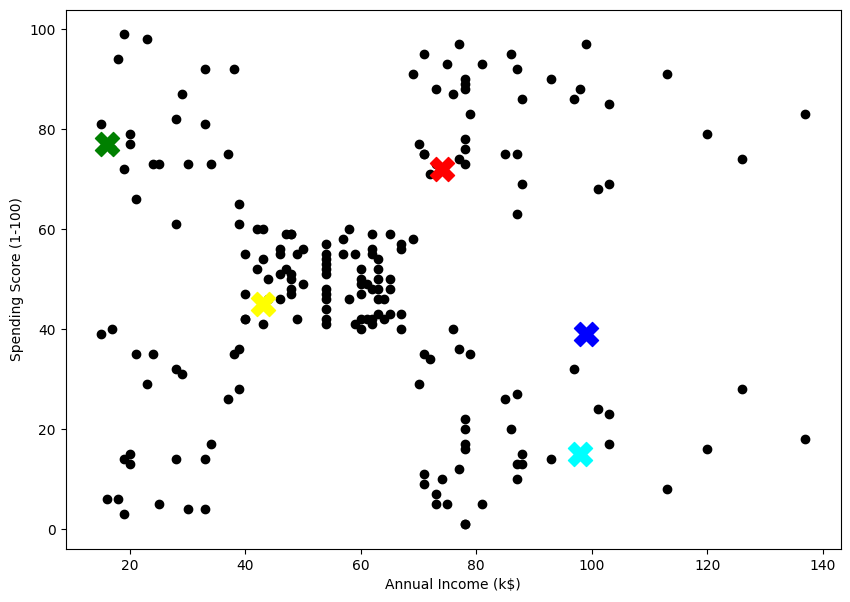

In [ ]:
fig,ax=plt.subplots(figsize=(10,7))
ax.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c='black')
for i in range(k):
  ax.scatter(initial_centroids[i][0],initial_centroids[i][1], marker='X',s=300, c=color[i])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [ ]:
# Perform k-means clustering to find optimal centroids for given data.
# This function iteratively updates centroids based on cluster assignments.
def k_means(x,initial_centroids,max_iters):
  m,n=x.shape # Extract the number of samples (m) and features (n) from the dataset
  k=initial_centroids.shape[0]
  centroids=initial_centroids  # Initialize centroids with the provided initial centroids
  for i in range(max_iters):# Iterate for a maximum number of iterations to update centroids
    nearby_centroids=find_closest_centroids(x,centroids) # Assign each data point to the nearest centroid.
    centroids=compute_centroids(x,nearby_centroid,k) # Update centroids based on the new cluster assignments.
  return nearby_centroids,centroids     # Return the final centroids and the cluster assignments for each data point

In [ ]:
nearby_centroids,final_centroids=k_means(x,initial_centroids,15)

In [ ]:
nearby_centroids

array([2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 2.,
       1., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1.,
       2., 1., 2., 1., 2., 1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 0., 3., 0., 3., 0., 3., 0., 3., 0., 3., 0., 3., 0.,
       3., 0., 3., 0., 3., 0., 3., 0., 3., 0., 3., 0., 3., 0., 3., 0., 3.,
       0., 3., 0., 3., 0., 3., 0., 3., 0., 3., 0., 3., 0., 3., 0., 3., 0.,
       3., 0., 3., 0., 3., 0., 3., 0., 3., 0., 3., 0., 3., 0., 4., 0., 3.,
       4., 3., 0., 3., 4., 3., 0., 4., 4., 4., 4., 4., 4.])

In [ ]:
final_centroids

array([[ 82.        ,  83.23529412],
       [ 25.72727273,  79.36363636],
       [ 48.16831683,  43.3960396 ],
       [ 83.05882353,  17.85294118],
       [118.77777778,  52.66666667]])

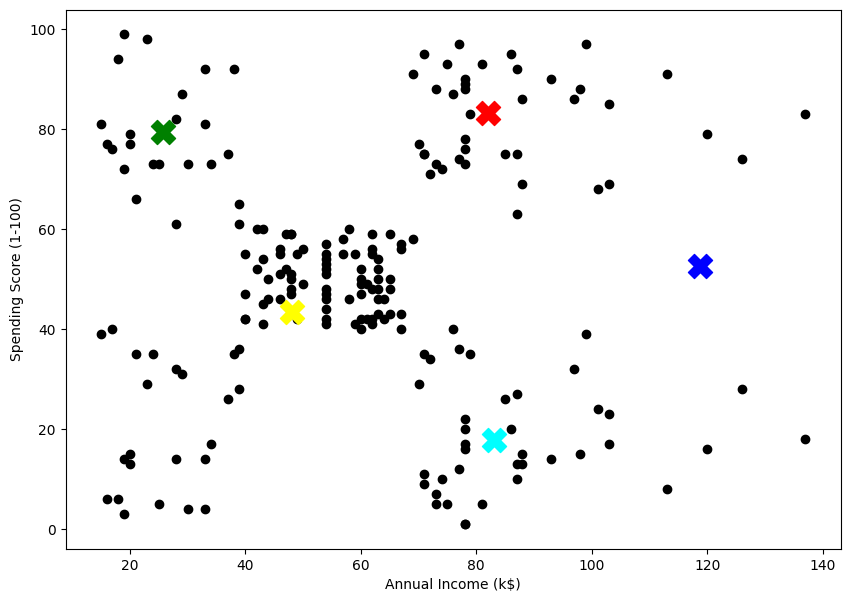

In [ ]:
fig,ax=plt.subplots(figsize=(10,7))
ax.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c='black')
for i in range(k):
  ax.scatter(final_centroids[i][0],final_centroids[i][1], marker='X',s=300, c=color[i])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [ ]:
cluster1=x.iloc[nearby_centroids==0]
cluster2=x.iloc[nearby_centroids==1]
cluster3=x.iloc[nearby_centroids==2]
cluster4=x.iloc[nearby_centroids==3]
cluster5=x.iloc[nearby_centroids==4]

In [ ]:
cluster1

,Annual Income (k$),Spending Score (1-100)
123,69,91
125,70,77
127,71,95
129,71,75
131,71,75
133,72,71
135,73,88
137,73,73
139,74,72
141,75,93


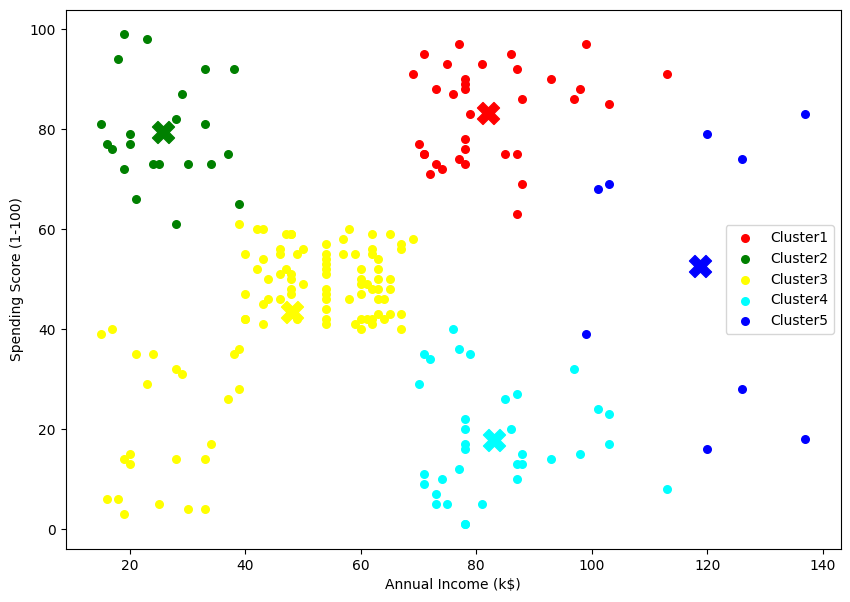

In [ ]:
color = ['red', 'green', 'yellow', 'cyan', 'blue']
fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(cluster1.iloc[:,0], cluster1.iloc[:,1], s=30, c='red', label='Cluster1')
ax.scatter(cluster2.iloc[:,0], cluster2.iloc[:,1], s=30, c='green', label='Cluster2')
ax.scatter(cluster3.iloc[:,0], cluster3.iloc[:,1], s=30, c='yellow', label='Cluster3')
ax.scatter(cluster4.iloc[:,0], cluster4.iloc[:,1], s=30, c='cyan', label='Cluster4')
ax.scatter(cluster5.iloc[:,0], cluster5.iloc[:,1], s=30, c='blue', label='Cluster5')
for i in range(k):
  ax.scatter(final_centroids[i][0], final_centroids[i][1], marker='X', s=250, c=color[i])
plt.legend()
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()